In [1]:
import numpy as np
import pandas as pd


from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from zodiac.zodiac import Zodiac

In [2]:
test = pd.read_csv('data/mnist_test.csv')
train = pd.read_csv('data/mnist_train.csv')

In [3]:
train_x = train['label']
test_x = test['label']

In [4]:
from sklearn.svm import SVC
del train["label"]
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train, train_x) 

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [5]:
res = np.array(test["label"])
del test["label"]
a = clf.predict(test)

In [7]:
zod = Zodiac(train_data=train,test_data=test,test_labels=res, test_predictions=a, model_type="multiclass",dim_red="PCA")

/Users/apoorvashetty/ze/zodiac/zodiac.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.test_data["labels"] = test_labels
/Users/apoorvashetty/ze/zodiac/zodiac.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.test_data["predictions"] = test_predictions


In [10]:
zod.set_metrics(metrics=["f1","accuracy","recall","precision"],average="macro")

Setting metrics..
Metrics set


In [15]:
zod.split_manual_grid(h=100)

Splitting the data into grids...
Generating density matrix...


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Completed


No handles with labels found to put in legend.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

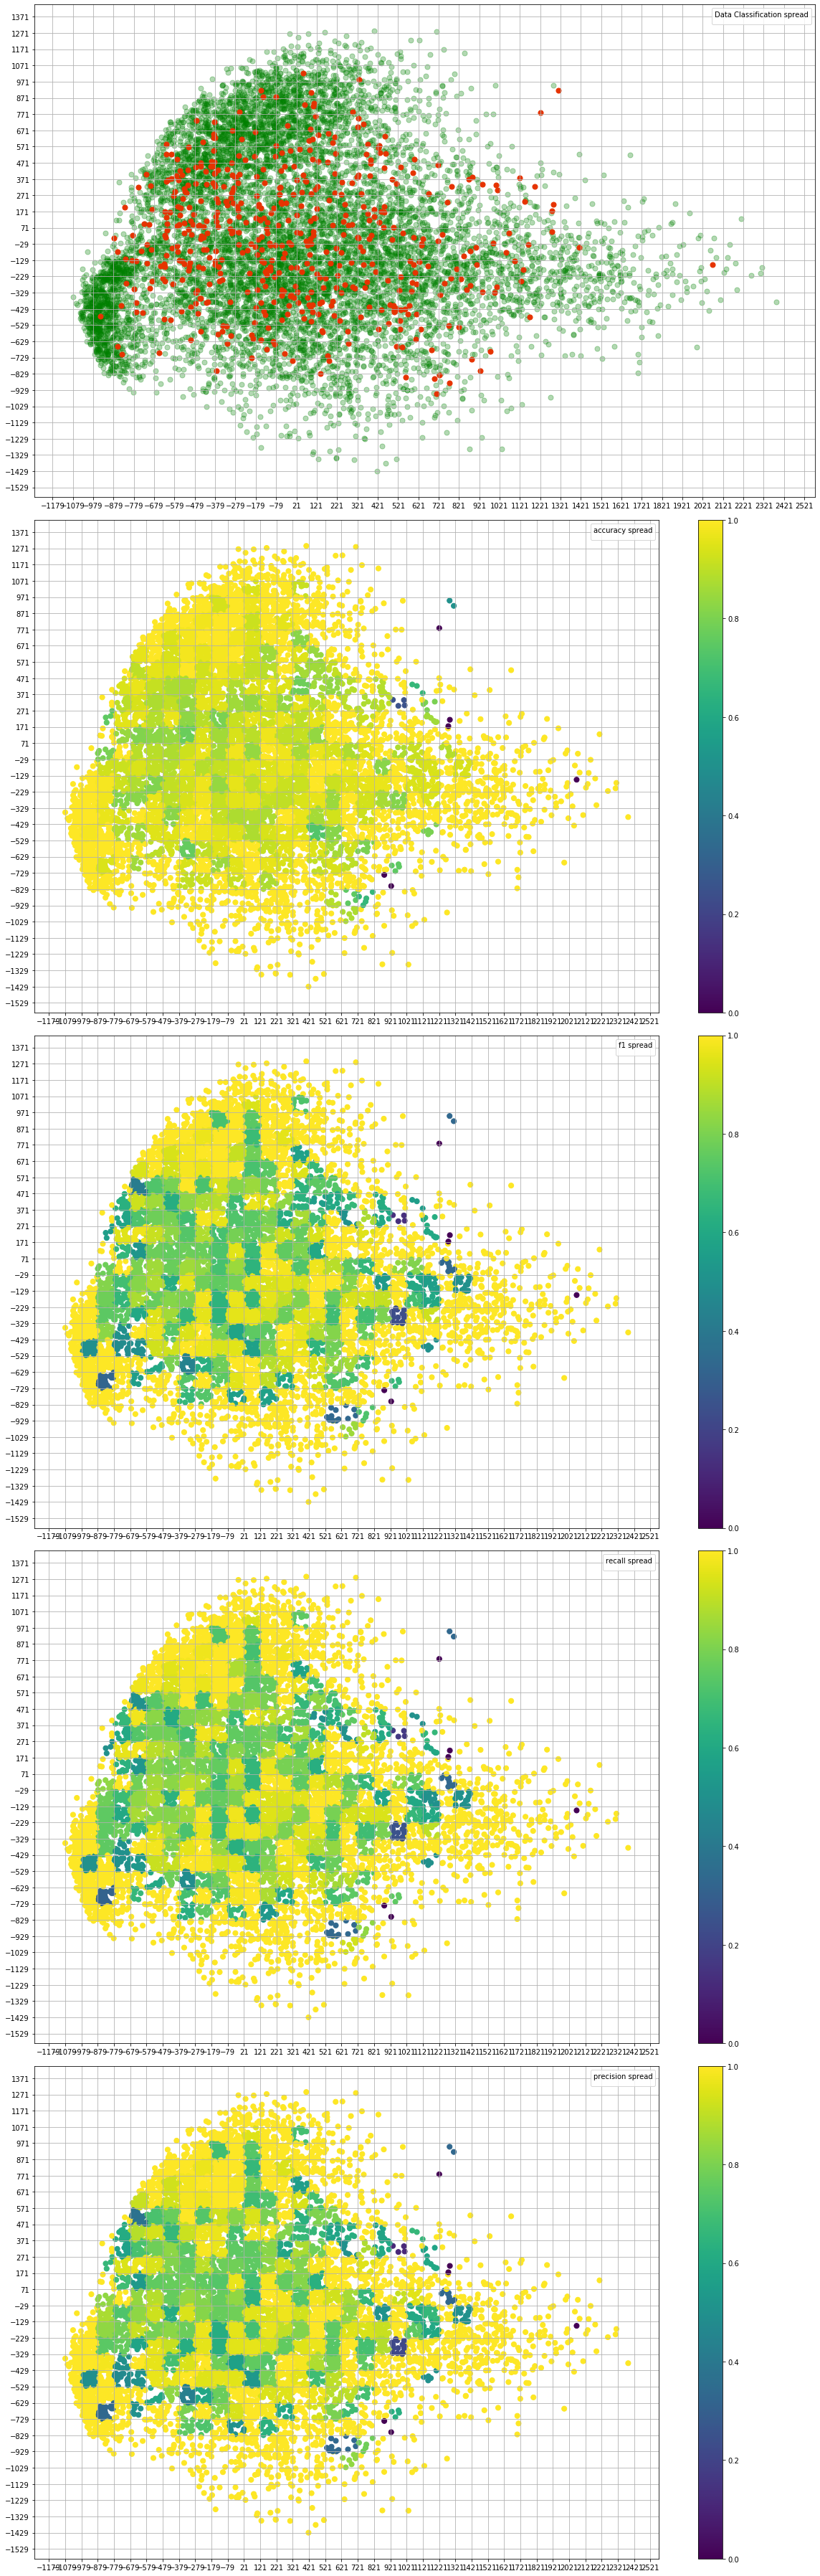

In [17]:
zod.split_plot(metrics=["accuracy","f1","recall","precision"])

In [ ]:
zod.metric_plot("accuracy")

In [18]:
zod.gen_parzen(radius = 100)

AssertionError: 11 columns passed, passed data had 7 columns

In [ ]:
zod.parzen_plot(metrics=["accuracy","f1","recall","precision"])

In [19]:
zod.pcolumns

['component 1',
 'component 2',
 'num points',
 'f1',
 'accuracy',
 'recall',
 'precision',
 'f1',
 'accuracy',
 'recall',
 'precision']